# HRNet Timm

In [7]:
%load_ext autoreload
%autoreload 2

import torch
import timm

from timm.data.dataset import ImageDataset

import torchvision.datasets as D
import torchvision.transforms.functional as TF

import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
timm.list_models("*HRNet*", pretrained=True)

['hrnet_w18',
 'hrnet_w18_small',
 'hrnet_w18_small_v2',
 'hrnet_w30',
 'hrnet_w32',
 'hrnet_w40',
 'hrnet_w44',
 'hrnet_w48',
 'hrnet_w64']

In [4]:
hrmodel = timm.create_model("hrnet_w18", pretrained=True)
hrmodel.eval()

hrmodel.reset_classifier(30)

In [5]:
dataset = D.Cityscapes('HRNet/data/cityscapes', split="val", target_type='semantic')

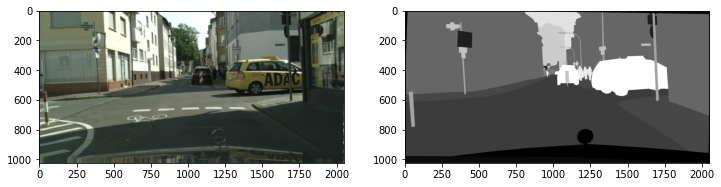

In [8]:
fig,ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].imshow(dataset[0][0])
ax[1].imshow(dataset[0][1], cmap='gray')

In [10]:
test = torch.Tensor(np.array([np.array(dataset[0][0])]))
test = torch.permute(test, (0, 3, 1, 2))
y = hrmodel(test)

In [11]:
y[0].argmax()

tensor(11)